In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hackerearth-how-not-to-lose-a-customer-in-10-days/sample_submission.csv
/kaggle/input/hackerearth-how-not-to-lose-a-customer-in-10-days/train.csv
/kaggle/input/hackerearth-how-not-to-lose-a-customer-in-10-days/test.csv


### Reading data:

In [2]:
train_data = pd.read_csv("../input/hackerearth-how-not-to-lose-a-customer-in-10-days/train.csv")
x_test = pd.read_csv("../input/hackerearth-how-not-to-lose-a-customer-in-10-days/test.csv")
ds_subm = pd.DataFrame(x_test['customer_id'])
print( "Shape of train:", train_data.shape)
train_data = train_data.drop_duplicates()
print( "Shape of train after droping duplicates:", train_data.shape)
print("Shape of test data:", x_test.shape)

#printing the data
train_data.head()

Shape of train: (36992, 25)
Shape of train after droping duplicates: (36992, 25)
Shape of test data: (19919, 24)


,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,...,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,...,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,...,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,...,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,...,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5


In [3]:
x_test.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
0,fffe43004900440031003700300030003400,Alethia Meints,50,F,OQJ1XAY,Village,Premium Membership,2015-11-02,No,xxxxxxxx,...,12,386.26,40721.44,7.0,733.830000,Yes,No,No,Not Applicable,Poor Product Quality
1,fffe43004900440031003900370037003300,Ming Lopez,41,M,OUQRPKO,Village,Gold Membership,2016-03-01,No,xxxxxxxx,...,11,37.80,9644.40,9.0,726.000000,Yes,No,No,Not Applicable,Poor Website
2,fffe43004900440034003800360037003000,Carina Flannigan,31,F,02J2RE7,Town,Silver Membership,2017-03-03,No,xxxxxxxx,...,18,215.36,3693.25,21.0,713.780000,Yes,No,Yes,Solved in Follow-up,No reason specified
3,fffe43004900440036003200370033003400,Kyung Wanner,64,M,5YEQIF1,Town,Silver Membership,2017-08-18,Yes,CID8941,...,-999,44.57,36809.56,11.0,744.970000,Yes,No,Yes,No Information Available,Too many ads
4,fffe43004900440035003000370031003900,Enola Gatto,16,F,100RYB5,Town,No Membership,2015-05-05,Yes,CID5690,...,6,349.88,40675.86,8.0,299.048351,No,Yes,Yes,Solved in Follow-up,Poor Website


### Looking at the distribution of Target variable:


<AxesSubplot:>

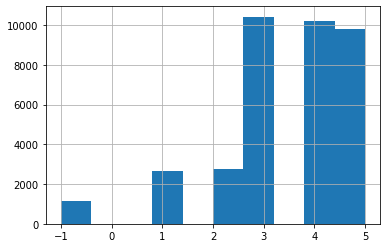

In [4]:
train_data['churn_risk_score'].hist()
## We are good to go. There are sufficient number of rows for each type of values to learn from.

### Basic Data Exploration:

In [5]:
print(train_data.info())
print("\n")
print(x_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36992 entries, 0 to 36991
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   36992 non-null  object 
 1   Name                          36992 non-null  object 
 2   age                           36992 non-null  int64  
 3   gender                        36992 non-null  object 
 4   security_no                   36992 non-null  object 
 5   region_category               31564 non-null  object 
 6   membership_category           36992 non-null  object 
 7   joining_date                  36992 non-null  object 
 8   joined_through_referral       36992 non-null  object 
 9   referral_id                   36992 non-null  object 
 10  preferred_offer_types         36704 non-null  object 
 11  medium_of_operation           36992 non-null  object 
 12  internet_option               36992 non-null  object 
 13  l

In [6]:
print(train_data.nunique())
print('\n')
print(x_test.nunique())

customer_id                     36992
Name                            36992
age                                55
gender                              3
security_no                     36992
region_category                     3
membership_category                 6
joining_date                     1096
joined_through_referral             3
referral_id                     11359
preferred_offer_types               3
medium_of_operation                 4
internet_option                     3
last_visit_time                 30101
days_since_last_login              27
avg_time_spent                  25961
avg_transaction_value           36894
avg_frequency_login_days         1654
points_in_wallet                23699
used_special_discount               2
offer_application_preference        2
past_complaint                      2
complaint_status                    5
feedback                            9
churn_risk_score                    6
dtype: int64


customer_id                     199

In [7]:
train_data.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score
count,36992.000000,36992.000000,36992.000000,36992.000000,33549.000000,36992.000000
mean,37.118161,-41.915576,243.472334,29271.194003,686.882199,3.463397
std,15.867412,228.819900,398.289149,19444.806226,194.063624,1.409661
min,10.000000,-999.000000,-2814.109110,800.460000,-760.661236,-1.000000
25%,23.000000,8.000000,60.102500,14177.540000,616.150000,3.000000
50%,37.000000,12.000000,161.765000,27554.485000,697.620000,4.000000
75%,51.000000,16.000000,356.515000,40855.110000,763.950000,5.000000
max,64.000000,26.000000,3235.578521,99914.050000,2069.069761,5.000000


In [8]:
x_test.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet
count,19919.000000,19919.000000,19919.000000,19919.000000,17956.000000
mean,36.884432,-39.216527,244.134926,29318.122196,685.968794
std,15.917311,223.274420,403.910806,19507.775429,192.152979
min,10.000000,-999.000000,-2180.780796,803.710000,-465.289977
25%,23.000000,8.000000,59.360000,14236.200000,615.730000
50%,37.000000,12.000000,161.240000,27564.050000,698.110000
75%,51.000000,16.000000,354.195000,40969.400000,764.732500
max,64.000000,26.000000,3350.060000,99995.030000,2019.671602


## Feature Engineering:

In [9]:
def to_num(data,feature):
    data[feature] = pd.to_numeric(data[feature],errors='coerce')

In [10]:
to_num(train_data,'avg_frequency_login_days')
to_num(x_test,'avg_frequency_login_days')

### Removing useless columns from the data:


In [11]:
useless = ['Name','security_no','referral_id','customer_id']
train_data = train_data.drop(useless,axis = 1)
x_test = x_test.drop(useless,axis = 1)
train_data.columns

Index(['age', 'gender', 'region_category', 'membership_category',
       'joining_date', 'joined_through_referral', 'preferred_offer_types',
       'medium_of_operation', 'internet_option', 'last_visit_time',
       'days_since_last_login', 'avg_time_spent', 'avg_transaction_value',
       'avg_frequency_login_days', 'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback', 'churn_risk_score'],
      dtype='object')

In [12]:
x_test.columns

Index(['age', 'gender', 'region_category', 'membership_category',
       'joining_date', 'joined_through_referral', 'preferred_offer_types',
       'medium_of_operation', 'internet_option', 'last_visit_time',
       'days_since_last_login', 'avg_time_spent', 'avg_transaction_value',
       'avg_frequency_login_days', 'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback'],
      dtype='object')

### Visualization:

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'days_since_last_login'}>],
       [<AxesSubplot:title={'center':'avg_time_spent'}>,
        <AxesSubplot:title={'center':'avg_transaction_value'}>],
       [<AxesSubplot:title={'center':'avg_frequency_login_days'}>,
        <AxesSubplot:title={'center':'points_in_wallet'}>]], dtype=object)

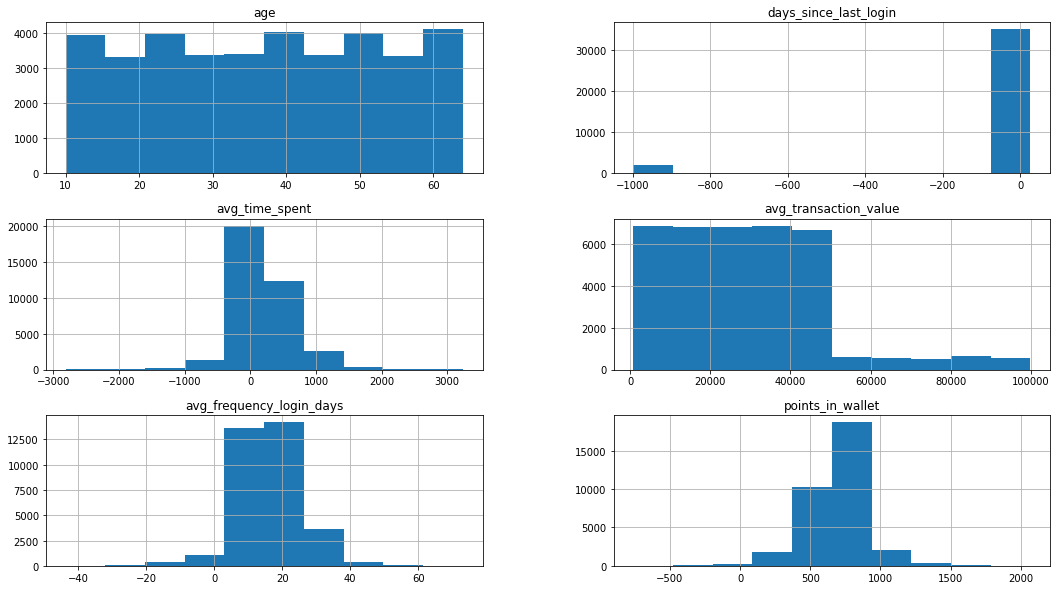

In [13]:
train_data.hist(['age','days_since_last_login','avg_time_spent','avg_transaction_value'
                 ,'avg_frequency_login_days','points_in_wallet'],figsize=(18,10),)

# avg time spent  - more skewed

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'days_since_last_login'}>],
       [<AxesSubplot:title={'center':'avg_time_spent'}>,
        <AxesSubplot:title={'center':'avg_transaction_value'}>],
       [<AxesSubplot:title={'center':'avg_frequency_login_days'}>,
        <AxesSubplot:title={'center':'points_in_wallet'}>]], dtype=object)

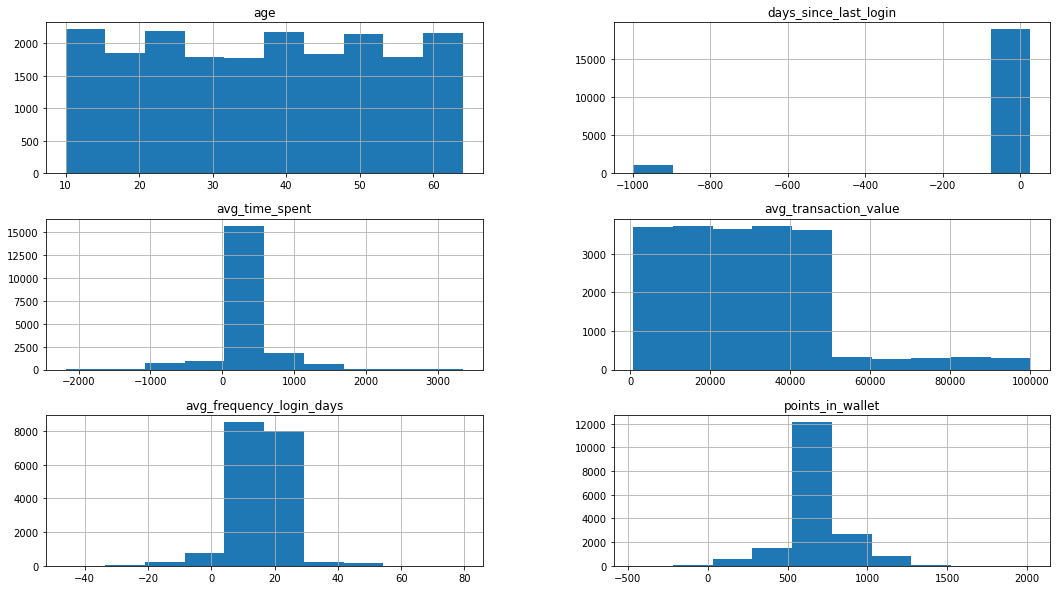

In [14]:
x_test.hist(['age','days_since_last_login','avg_time_spent','avg_transaction_value'
                 ,'avg_frequency_login_days','points_in_wallet'],figsize=(18,10),)

In [15]:
def PlotBarCharts(inpData, colsToPlot):
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=3, ncols=4, figsize=(28,15))
    
    subPlot = subPlot.ravel()

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

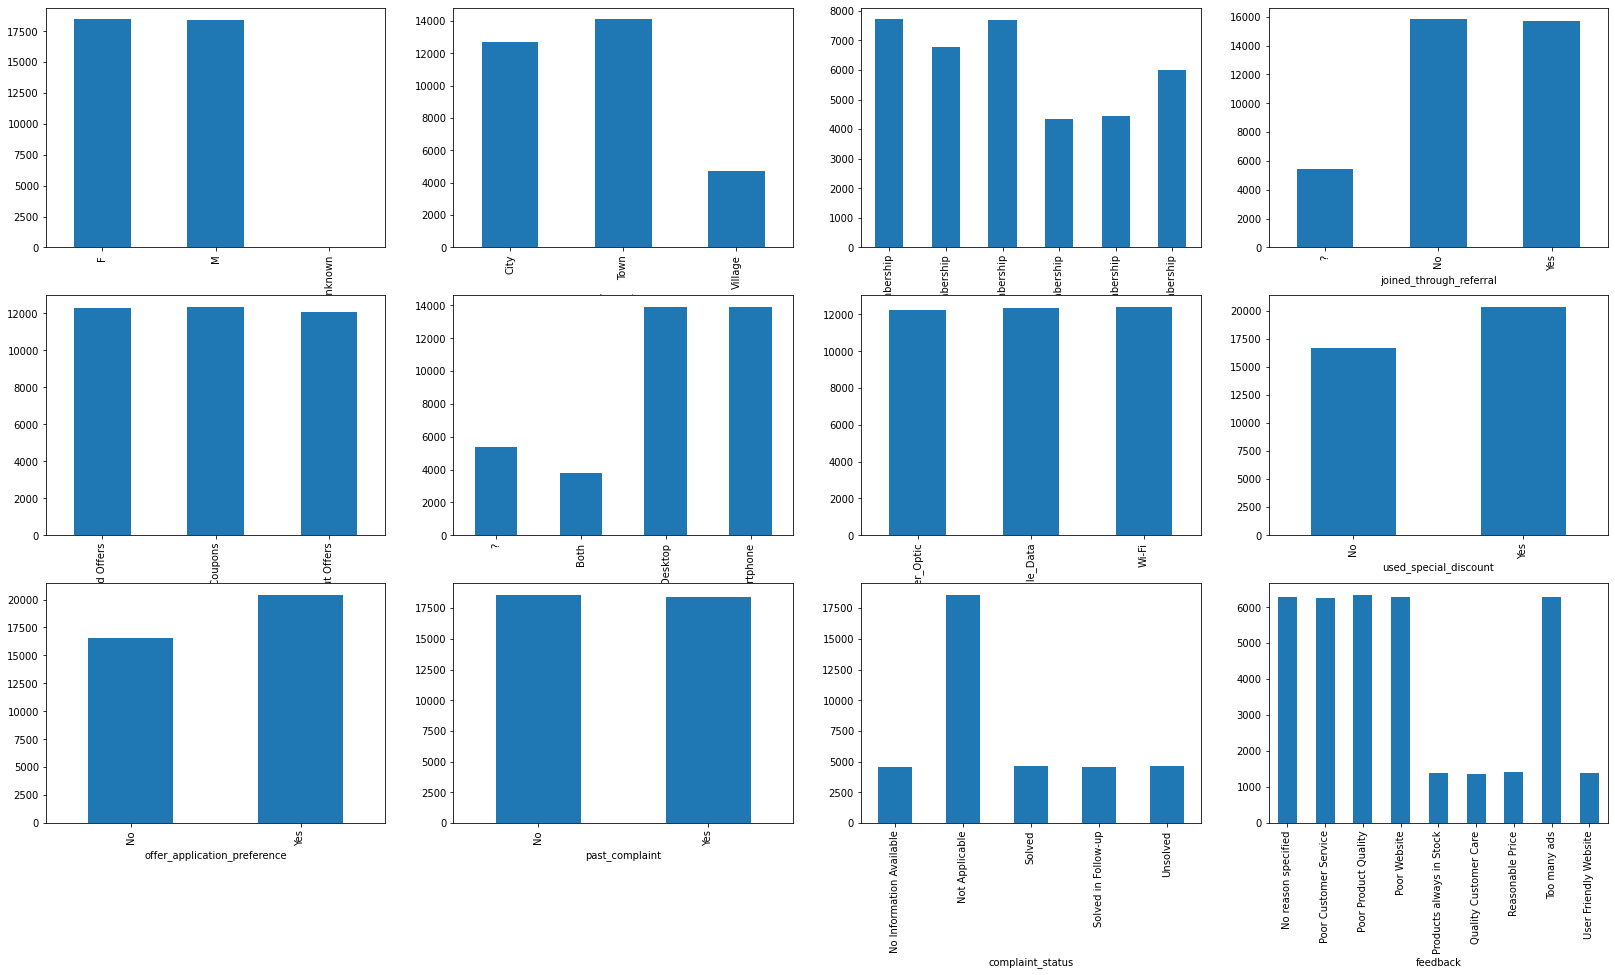

In [16]:
# Calling the function
PlotBarCharts(inpData=train_data, colsToPlot=['gender', 'region_category', 'membership_category',
        'joined_through_referral', 'preferred_offer_types',
       'medium_of_operation', 'internet_option' ,
        'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback'])

#by loooking at graph we can say that each value in each features has enough data for model to learn.

## Outlier treatment: 

**Replacing outliers: Have to treat them one by one.**


Days Since Last Login:

In [17]:
#days_since_last_login
train_data['days_since_last_login'][train_data['days_since_last_login']>0].sort_values(ascending=True)

31851     1
32057     1
23411     1
32060     1
35559     1
         ..
23645    26
15496    26
4152     26
21055    26
18361    26
Name: days_since_last_login, Length: 34993, dtype: int64

In [18]:
x_test['days_since_last_login'][x_test['days_since_last_login']>0].sort_values(ascending=True)

13047     1
8698      1
5676      1
8143      1
372       1
         ..
6211     26
11433    26
16089    26
19617    26
14367    26
Name: days_since_last_login, Length: 18897, dtype: int64

In [19]:
train_data['days_since_last_login'][train_data['days_since_last_login']<0]=1
x_test['days_since_last_login'][x_test['days_since_last_login']<0]=1

Avg Time Spent:

In [20]:
#avg_time_spent
train_data['avg_time_spent'][train_data['avg_time_spent']>0].sort_values(ascending=True)

18772       1.837399
15827      15.114910
6728       22.729738
35204      25.445493
14316      29.837667
            ...     
2214     2770.560000
17450    2861.230000
24508    2899.660000
24014    3040.410000
33680    3235.578521
Name: avg_time_spent, Length: 35273, dtype: float64

In [21]:
train_data['avg_time_spent'][train_data['avg_time_spent']<3000].sort_values(ascending=False)

24508    2899.660000
17450    2861.230000
2214     2770.560000
31703    2766.750000
25562    2747.891340
            ...     
26833   -2034.801880
3565    -2093.121606
9867    -2096.580681
27259   -2281.236526
23206   -2814.109110
Name: avg_time_spent, Length: 36990, dtype: float64

In [22]:
x_test['avg_time_spent'][x_test['avg_time_spent']>0].sort_values(ascending=True)

14603      13.111290
4511       14.092768
12490      30.000000
16366      30.000000
6196       30.000000
            ...     
6877     2821.700394
13093    2830.522122
700      3005.450000
10026    3218.150000
7802     3350.060000
Name: avg_time_spent, Length: 18988, dtype: float64

In [23]:
train_data['avg_time_spent'][train_data['avg_time_spent']<0]=1.837399
train_data['avg_time_spent'][train_data['avg_time_spent']>3000]=2899.660000
x_test['avg_time_spent'][x_test['avg_time_spent']<0]=13.111290
x_test['avg_time_spent'][x_test['avg_time_spent']>3000]=2830.522122



Avg Freq Login Days:

In [24]:
train_data['avg_frequency_login_days'][train_data['avg_frequency_login_days']>0].sort_values(ascending=True)

8804      0.009208
16751     0.027318
25562     0.030449
4459      0.113511
16161     0.132288
           ...    
13585    56.161979
4622     56.538478
5393     63.523537
32504    67.062422
15597    73.061995
Name: avg_frequency_login_days, Length: 32787, dtype: float64

In [25]:
train_data['avg_frequency_login_days'][train_data['avg_frequency_login_days']<60].sort_values(ascending=True)

5549    -43.652702
36525   -43.625413
2754    -37.424778
1103    -35.815758
28807   -34.417115
           ...    
15625    55.422853
4679     55.652396
22760    56.046586
13585    56.161979
4622     56.538478
Name: avg_frequency_login_days, Length: 33467, dtype: float64

In [26]:
x_test['avg_frequency_login_days'][x_test['avg_frequency_login_days']>0].sort_values(ascending=True)

10007     0.127616
14727     0.246415
7113      0.275809
106       0.278740
17197     0.332573
           ...    
5949     70.513074
13903    76.166776
10081    76.808483
19157    77.860123
11558    79.469927
Name: avg_frequency_login_days, Length: 17609, dtype: float64

In [27]:
train_data['avg_frequency_login_days'][train_data['avg_frequency_login_days']<0]=0.009208
train_data['avg_frequency_login_days'][train_data['avg_frequency_login_days']>60]=56.538478
x_test['avg_frequency_login_days'][x_test['avg_frequency_login_days']<0]=0.127616
#x_test['avg_frequency_login_days'][x_test['avg_frequency_login_days']>60]=58.445839


Points In Wallet:

In [28]:
train_data['points_in_wallet'][train_data['points_in_wallet']>0].sort_values(ascending=True)

30319       6.432208
33885       6.861261
21125       8.116084
35013       8.791558
2440        9.837591
            ...     
12751    1759.002532
18768    1763.351594
29361    1780.720173
16322    1816.933696
32528    2069.069761
Name: points_in_wallet, Length: 33413, dtype: float64

In [29]:
x_test['points_in_wallet'][x_test['points_in_wallet']>0].sort_values(ascending=True)

19599       6.034666
17671       9.490484
17564      13.201942
1183       15.945980
3962       16.798932
            ...     
15463    1730.549571
11705    1736.522643
12245    1783.307652
12215    1830.797420
13141    2019.671602
Name: points_in_wallet, Length: 17895, dtype: float64

In [30]:
train_data['points_in_wallet'][train_data['points_in_wallet']<0]= 6.432208
x_test['points_in_wallet'][x_test['points_in_wallet']<0]= 6.034666

# Missing Values:

### Look out for missing values and treat them.

### Getting percentage value of missing values:

In [31]:
#lets create a dataframe which shows us the missing value and percentage-
#-missing values.

def missing_per(data):
    #missing_data.columns = ["Feature","missing_num"]
    missing_data = data.isna().sum().reset_index()
    missing_data.columns = ["Feature","Missing_Value"]
    missing_data['Missing_Percent'] = round(missing_data.Missing_Value / len(data) * 100,2) 
    return  missing_data[missing_data.Missing_Value > 0]

In [32]:
#train data
to_be_imputed = missing_per(train_data)
to_be_imputed

,Feature,Missing_Value,Missing_Percent
2,region_category,5428,14.67
6,preferred_offer_types,288,0.78
13,avg_frequency_login_days,3522,9.52
14,points_in_wallet,3443,9.31


In [33]:
#test data
to_be_imputed = missing_per(x_test)
to_be_imputed

,Feature,Missing_Value,Missing_Percent
2,region_category,2948,14.80
6,preferred_offer_types,159,0.80
13,avg_frequency_login_days,1915,9.61
14,points_in_wallet,1963,9.85


### Imputing the values:

#### Imputing categorical features for both train and test:

In [34]:
#handling the missing values in categorical features
def impute_cat(data,feature):
    #data[feature]= np.where(data[feature].isnull(),"Unknown",data[feature])
    data[feature] = data[feature].replace([np.nan,'?'],'Unknown')

In [35]:
for features in ['region_category','preferred_offer_types','joined_through_referral','medium_of_operation']:
    impute_cat(train_data,features)
    impute_cat(x_test,features)

#### Imputing numerical features for both train and test:

In [36]:
#handling the missing values in numerical features
def impute_num(data,feature):
    data[feature] = data[feature].fillna(data[feature].mean())

In [37]:
for features in ['points_in_wallet','avg_frequency_login_days']:
    impute_num(train_data,features)
    impute_num(x_test,features)

In [38]:
#dropping rows with -1 as value i churn risk score
train_data['churn_risk_score'] = train_data['churn_risk_score'].replace(-1,np.nan)
train_data = train_data.dropna()

In [39]:
x_test.isna().sum()

age                             0
gender                          0
region_category                 0
membership_category             0
joining_date                    0
joined_through_referral         0
preferred_offer_types           0
medium_of_operation             0
internet_option                 0
last_visit_time                 0
days_since_last_login           0
avg_time_spent                  0
avg_transaction_value           0
avg_frequency_login_days        0
points_in_wallet                0
used_special_discount           0
offer_application_preference    0
past_complaint                  0
complaint_status                0
feedback                        0
dtype: int64

## Feature Selection:

In [40]:
#correlation to select features:
#threshold > 0.2 in magnitude
train_data.corr()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,churn_risk_score
age,1.000000,-0.003306,-0.000576,0.000015,-0.001340,0.000682,0.002400
days_since_last_login,-0.003306,1.000000,-0.092630,-0.012135,0.013287,0.004522,0.023056
avg_time_spent,-0.000576,-0.092630,1.000000,0.023594,0.000394,-0.003954,-0.027558
avg_transaction_value,0.000015,-0.012135,0.023594,1.000000,-0.131829,0.084465,-0.363009
avg_frequency_login_days,-0.001340,0.013287,0.000394,-0.131829,1.000000,-0.046283,0.210584
points_in_wallet,0.000682,0.004522,-0.003954,0.084465,-0.046283,1.000000,-0.313905
churn_risk_score,0.002400,0.023056,-0.027558,-0.363009,0.210584,-0.313905,1.000000


In [41]:
train_data.corr()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,churn_risk_score
age,1.000000,-0.003306,-0.000576,0.000015,-0.001340,0.000682,0.002400
days_since_last_login,-0.003306,1.000000,-0.092630,-0.012135,0.013287,0.004522,0.023056
avg_time_spent,-0.000576,-0.092630,1.000000,0.023594,0.000394,-0.003954,-0.027558
avg_transaction_value,0.000015,-0.012135,0.023594,1.000000,-0.131829,0.084465,-0.363009
avg_frequency_login_days,-0.001340,0.013287,0.000394,-0.131829,1.000000,-0.046283,0.210584
points_in_wallet,0.000682,0.004522,-0.003954,0.084465,-0.046283,1.000000,-0.313905
churn_risk_score,0.002400,0.023056,-0.027558,-0.363009,0.210584,-0.313905,1.000000


In [42]:
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [43]:
CategoricalPredictorList=['gender', 'region_category', 'membership_category',
        'joined_through_referral', 'preferred_offer_types',
       'medium_of_operation', 'internet_option' ,
        'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback']
FunctionAnova(inpData=train_data, 
              TargetVariable='churn_risk_score', 
              CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

gender is NOT correlated with churn_risk_score | P-Value: 0.7482755930377535
region_category is correlated with churn_risk_score | P-Value: 6.625172529955838e-11
membership_category is correlated with churn_risk_score | P-Value: 0.0
joined_through_referral is correlated with churn_risk_score | P-Value: 5.991549021353097e-24
preferred_offer_types is correlated with churn_risk_score | P-Value: 1.8615166638212552e-36
medium_of_operation is correlated with churn_risk_score | P-Value: 3.4702653469698536e-11
internet_option is NOT correlated with churn_risk_score | P-Value: 0.9153465291596974
used_special_discount is correlated with churn_risk_score | P-Value: 0.03784064933682765
offer_application_preference is correlated with churn_risk_score | P-Value: 1.6391044936172288e-11
past_complaint is correlated with churn_risk_score | P-Value: 0.02084965837190241
complaint_status is NOT correlated with churn_risk_score | P-Value: 0.1125659546335762
feedback is correlate

['region_category',
 'membership_category',
 'joined_through_referral',
 'preferred_offer_types',
 'medium_of_operation',
 'used_special_discount',
 'offer_application_preference',
 'past_complaint',
 'feedback']

### Selected Features:

In [44]:
Selected_columns = ['avg_transaction_value','avg_frequency_login_days','points_in_wallet','region_category','membership_category',
                    'joined_through_referral','preferred_offer_types','medium_of_operation',
                    'used_special_discount','offer_application_preference','past_complaint','feedback','churn_risk_score']
for_test = ['avg_transaction_value','avg_frequency_login_days','points_in_wallet','region_category','membership_category',
                    'joined_through_referral','preferred_offer_types','medium_of_operation',
                    'used_special_discount','offer_application_preference','past_complaint','feedback']
dataforml = train_data[Selected_columns]
dataforml['churn_risk_score'] = dataforml['churn_risk_score'].astype('int')
X_test = x_test[for_test]
X_test.columns

Index(['avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet',
       'region_category', 'membership_category', 'joined_through_referral',
       'preferred_offer_types', 'medium_of_operation', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'feedback'],
      dtype='object')

# Separation of data:

In [45]:
#define x_train and y_train
x_train = dataforml.iloc[:,:12]   
y_train = dataforml.iloc[:,-1:]              

# Encoding:

In [46]:
!pip install feature-engine
from feature_engine.encoding import CountFrequencyEncoder

encoder = CountFrequencyEncoder(encoding_method='count',variables=None)
X_train = encoder.fit_transform(x_train)
X_train.head()

     |████████████████████████████████| 152 kB 2.9 MB/s 


,avg_transaction_value,avg_frequency_login_days,points_in_wallet,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,used_special_discount,offer_application_preference,past_complaint,feedback
0,53005.25,17.0,781.750000,4549,4202,15354,11977,5230,19718,19783,18007,1345
1,12838.38,10.0,687.582219,12315,4308,5292,11977,13476,19718,16046,17822,1320
2,21027.00,22.0,500.690000,13702,7466,15183,11977,13476,16111,19783,17822,6060
3,25239.56,6.0,567.660000,12315,7466,15183,11977,13476,16111,19783,17822,6060
4,24483.66,16.0,663.060000,12315,7466,15354,11860,13444,16111,19783,17822,6060


In [47]:
X_test = encoder.transform(X_test)
X_test

,avg_transaction_value,avg_frequency_login_days,points_in_wallet,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,used_special_discount,offer_application_preference,past_complaint,feedback
0,40721.44,7.000000,733.830000,4549,4308,15354,11716,13444,19718,16046,18007,6152
1,9644.40,9.000000,726.000000,4549,6574,15354,11716,13476,19718,16046,18007,6060
2,3693.25,21.000000,713.780000,13702,5806,15354,11977,3679,19718,16046,17822,6072
3,36809.56,11.000000,744.970000,13702,5806,15183,11860,5230,19718,16046,17822,6096
4,40675.86,8.000000,299.048351,13702,7466,15183,11716,13444,16111,19783,17822,6060
...,...,...,...,...,...,...,...,...,...,...,...,...
19914,46279.35,18.000000,708.120000,5263,6574,15354,11716,13476,16111,19783,18007,6152
19915,23466.26,16.162214,574.340000,4549,7466,15183,11716,13476,16111,19783,18007,6072
19916,17903.75,24.000000,564.300000,13702,7466,15354,11860,13476,16111,19783,17822,6072
19917,14057.09,22.000000,606.340000,12315,5806,15183,11860,13444,16111,19783,18007,6060


## Model:

In [48]:
#score = 100 x metrics.f1_score(actual, predicted, average="macro")
from sklearn import tree , metrics , ensemble , linear_model
from sklearn.metrics import f1_score
#ds = ensemble.RandomForestClassifier(max_depth=9)      #9,800
ds = tree.DecisionTreeClassifier(max_depth=9)
ds.fit(X_train,y_train)


DecisionTreeClassifier(max_depth=9)

In [49]:
train_pred = ds.predict(X_train)

In [50]:
score =  100 * metrics.f1_score(y_train, train_pred, average="macro")
score

80.20309730653038

In [51]:
test_pred = ds.predict(X_test)

In [52]:
ds_subm.index = X_test.index
ds_subm['churn_risk_score'] = test_pred
ds_subm.to_csv('dectre_sub_dep9.csv',index = False)

In [53]:
ds_subm.head()

,customer_id,churn_risk_score
0,fffe43004900440031003700300030003400,3
1,fffe43004900440031003900370037003300,3
2,fffe43004900440034003800360037003000,3
3,fffe43004900440036003200370033003400,3
4,fffe43004900440035003000370031003900,5


# so far max_depth 9 gives best result that is 76.31